In [1]:
from __future__ import print_function, division

from model.ddpg.actor import ActorNetwork
from model.ddpg.critic import CriticNetwork
from model.ddpg.ddpg import DDPG
from model.ornstein_uhlenbeck import OrnsteinUhlenbeckActionNoise
from model.td3.actor import TD3ActorNetwork
from model.td3.critic import TD3CriticNetwork
from model.td3.td3 import TD3
from stock_trading import StockActor, StockCritic, TD3StockActor, TD3StockCritic, obs_normalizer, get_model_path, get_result_path, test_model, get_variable_scope, test_model_multiple

from environment.portfolio import PortfolioEnv
from utils.data import read_stock_history, normalize

import numpy as np
import tflearn
import tensorflow as tf
import argparse
import pprint
import pandas as pd
import matplotlib.pyplot as plt
print("Imports Complete!")







Imports Complete!


In [2]:
_framework = 'DDPG' # DDPG/TD3
_predictor_type = 'lstm'
_window_length = 3
window_length = int(_window_length)
_batch_norm = 'True'
print("Model: {}-{}-{}".format(_framework, _predictor_type, _window_length))

Model: DDPG-lstm-3


In [3]:
# Stock History
history, assets, date_list = read_stock_history(filepath='utils/datasets/yahoo_snp500_dataset.h5')
history = history[:, :, :4]
#steps = (len(history[0]) - window_length - 1)
steps = 1000
print("Stock History Shape: {}".format(history.shape))
print("Steps: {}".format(steps))

Stock History Shape: (17, 8703, 4)
Steps: 1000


In [4]:
actor_learning_rate = 1e-4
critic_learning_rate = 1e-3
print("Actor Learning Rate: {}".format(actor_learning_rate))
print("Critic Learning Rate: {}".format(critic_learning_rate))

Actor Learning Rate: 0.0001
Critic Learning Rate: 0.001


In [5]:
# setup environment
env = PortfolioEnv(history, assets, date_list, steps=steps, window_length=window_length)

nb_classes = len(assets) + 1
action_dim = [nb_classes]
state_dim = [nb_classes, window_length]
batch_size = 64
action_bound = 1.
tau = 1e-3

/home/nigelcuschieri/anaconda3/envs/tensor_keras_portfolio/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [6]:
assert _framework in ['DDPG', 'TD3'], 'Framework must be either PG, DDPG or TD3'
framework = _framework
assert _predictor_type in ['cnn', 'lstm'], 'Predictor must be either cnn or lstm'
predictor_type = _predictor_type
if _batch_norm == 'True':
    use_batch_norm = True
elif _batch_norm == 'False':
    use_batch_norm = False
else:
    raise ValueError('Unknown batch norm argument')

actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))
model_save_path = get_model_path(framework, window_length, predictor_type, use_batch_norm)
summary_path = get_result_path(framework, window_length, predictor_type, use_batch_norm)
variable_scope = get_variable_scope(framework, window_length, predictor_type, use_batch_norm)


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



Build model from scratch

calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train


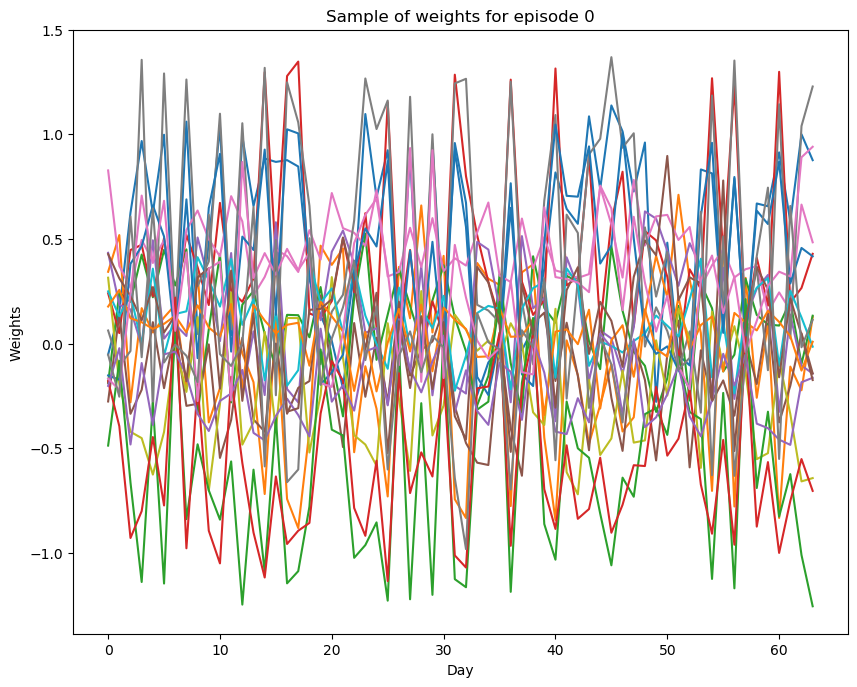

Episode: 0, Reward: -0.07, Qmax: 0.0260
Episode: 1, Reward: 0.29, Qmax: 0.0351
Episode: 2, Reward: 0.27, Qmax: 0.0406
Episode: 3, Reward: -1.35, Qmax: 0.0459
Episode: 4, Reward: 0.14, Qmax: 0.0492
Episode: 5, Reward: 0.18, Qmax: 0.0526
Episode: 6, Reward: 0.61, Qmax: 0.0560
Episode: 7, Reward: 0.76, Qmax: 0.0587
Episode: 8, Reward: 0.44, Qmax: 0.0585
Episode: 9, Reward: 0.28, Qmax: 0.0629


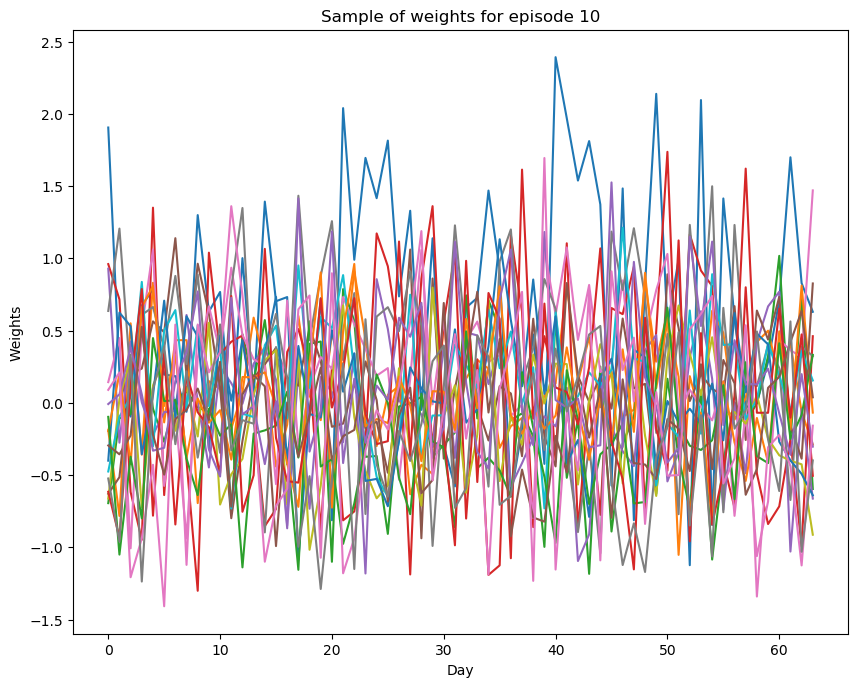

Episode: 10, Reward: -0.07, Qmax: 0.0675
Episode: 11, Reward: -0.09, Qmax: 0.0701
Episode: 12, Reward: 0.25, Qmax: 0.0710
Episode: 13, Reward: 0.17, Qmax: 0.0744
Episode: 14, Reward: -0.38, Qmax: 0.0733
Episode: 15, Reward: 0.55, Qmax: 0.0783
Episode: 16, Reward: 0.24, Qmax: 0.0790
Episode: 17, Reward: 0.54, Qmax: 0.0774
Episode: 18, Reward: -0.08, Qmax: 0.0764
Episode: 19, Reward: 0.25, Qmax: 0.0790


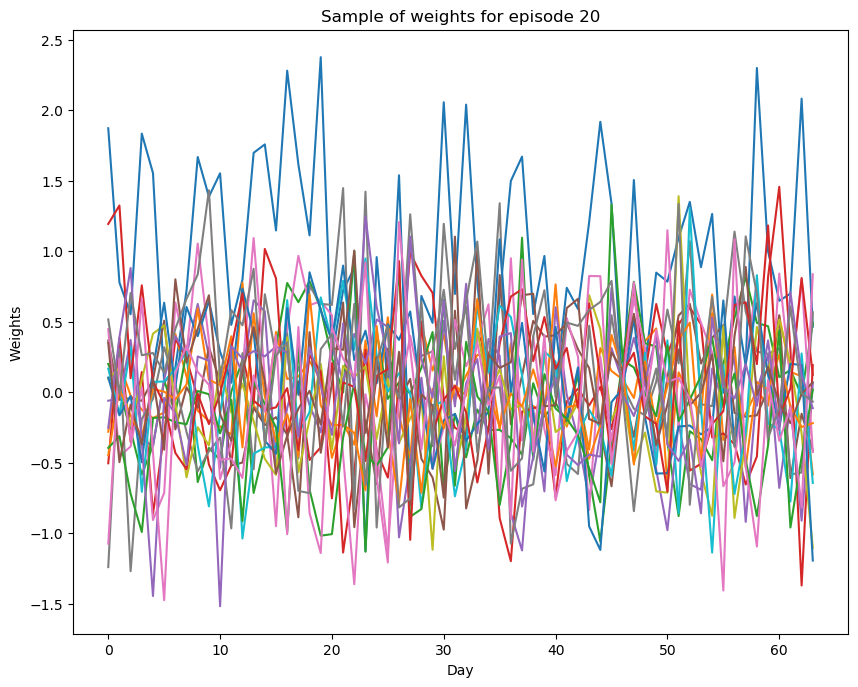

Episode: 20, Reward: 0.19, Qmax: 0.0780
Episode: 21, Reward: -0.24, Qmax: 0.0773
Episode: 22, Reward: 0.17, Qmax: 0.0792
Episode: 23, Reward: 0.48, Qmax: 0.0817
Episode: 24, Reward: 0.34, Qmax: 0.0793
Episode: 25, Reward: -0.05, Qmax: 0.0840
Episode: 26, Reward: 0.05, Qmax: 0.0839
Episode: 27, Reward: 0.41, Qmax: 0.0849
Episode: 28, Reward: 0.57, Qmax: 0.0828
Episode: 29, Reward: 0.30, Qmax: 0.0839


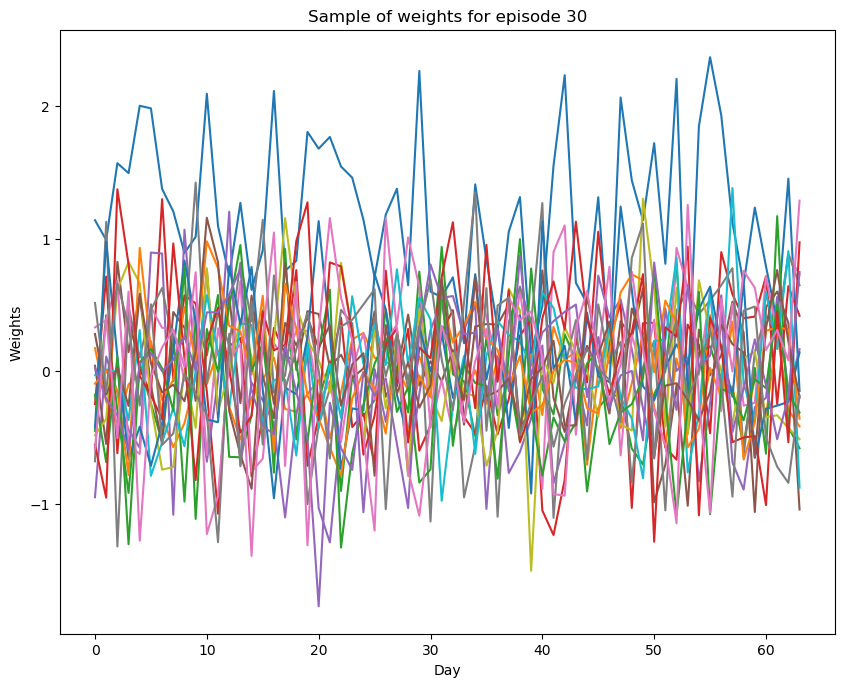

Episode: 30, Reward: 0.10, Qmax: 0.0852
Episode: 31, Reward: -0.21, Qmax: 0.0836
Episode: 32, Reward: 0.76, Qmax: 0.0850
Episode: 33, Reward: 0.17, Qmax: 0.0846
Episode: 34, Reward: 0.93, Qmax: 0.0859
Episode: 35, Reward: -0.06, Qmax: 0.0871
Episode: 36, Reward: -0.44, Qmax: 0.0867
Episode: 37, Reward: 0.79, Qmax: 0.0890
Episode: 38, Reward: 0.33, Qmax: 0.0899
Episode: 39, Reward: 0.19, Qmax: 0.0929


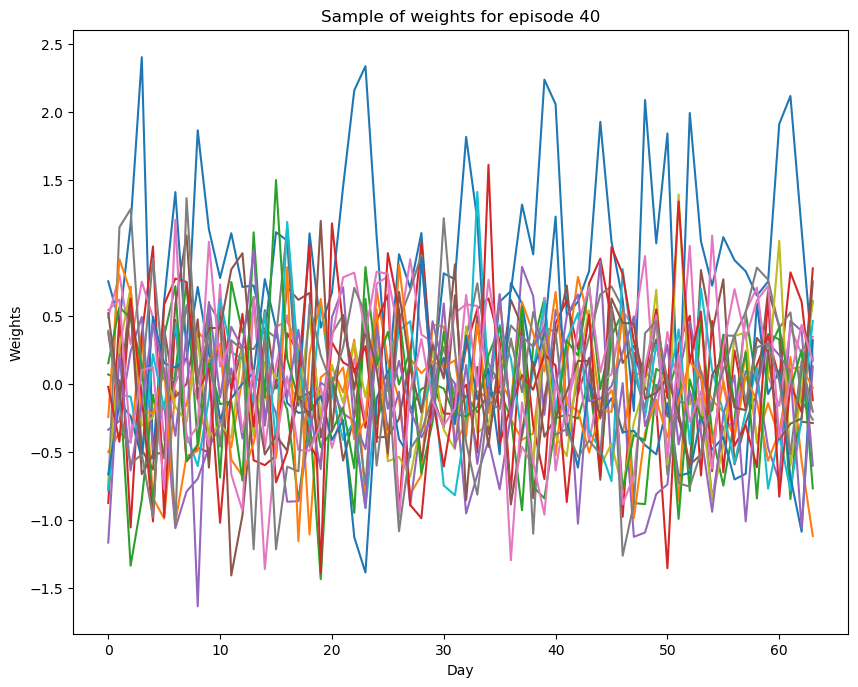

Episode: 40, Reward: 0.26, Qmax: 0.0964
Episode: 41, Reward: 0.04, Qmax: 0.0962
Episode: 42, Reward: 0.50, Qmax: 0.0975
Episode: 43, Reward: 0.47, Qmax: 0.0981
Episode: 44, Reward: 0.28, Qmax: 0.0976
Episode: 45, Reward: 0.14, Qmax: 0.0985
Episode: 46, Reward: 0.08, Qmax: 0.0979
Episode: 47, Reward: 0.09, Qmax: 0.0983
Episode: 48, Reward: 0.26, Qmax: 0.0972
Episode: 49, Reward: -0.18, Qmax: 0.0997


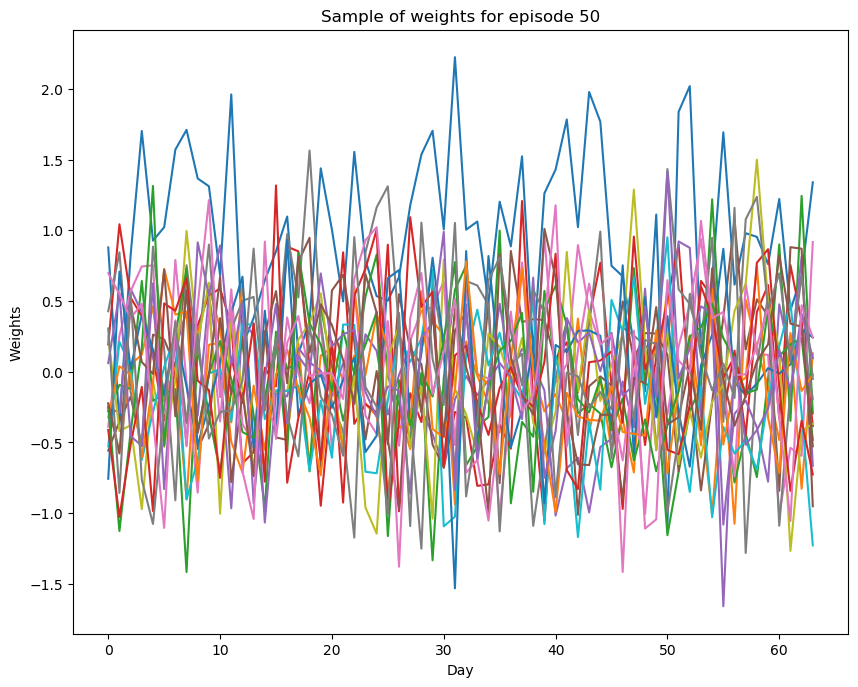

Episode: 50, Reward: 0.74, Qmax: 0.0977
Episode: 51, Reward: -0.12, Qmax: 0.0996
Episode: 52, Reward: 0.44, Qmax: 0.0970
Episode: 53, Reward: 0.69, Qmax: 0.0970
Episode: 54, Reward: 0.28, Qmax: 0.0974
Episode: 55, Reward: 0.33, Qmax: 0.0974
Episode: 56, Reward: -0.02, Qmax: 0.0980
Episode: 57, Reward: 0.31, Qmax: 0.0999
Episode: 58, Reward: 0.15, Qmax: 0.0997
Episode: 59, Reward: 0.19, Qmax: 0.1004


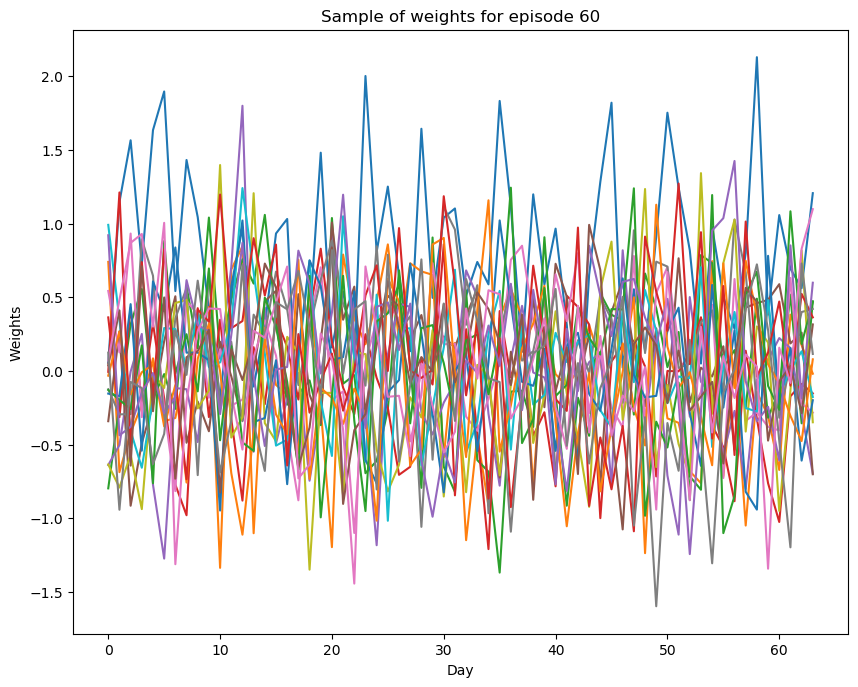

Episode: 60, Reward: -0.17, Qmax: 0.1030
Episode: 61, Reward: 0.12, Qmax: 0.1026
Episode: 62, Reward: 0.14, Qmax: 0.1086
Episode: 63, Reward: 0.41, Qmax: 0.1058
Episode: 64, Reward: 0.37, Qmax: 0.1065
Episode: 65, Reward: 0.14, Qmax: 0.1077
Episode: 66, Reward: 0.21, Qmax: 0.1095
Episode: 67, Reward: 0.70, Qmax: 0.1080
Episode: 68, Reward: 0.08, Qmax: 0.1106
Episode: 69, Reward: 0.09, Qmax: 0.1099


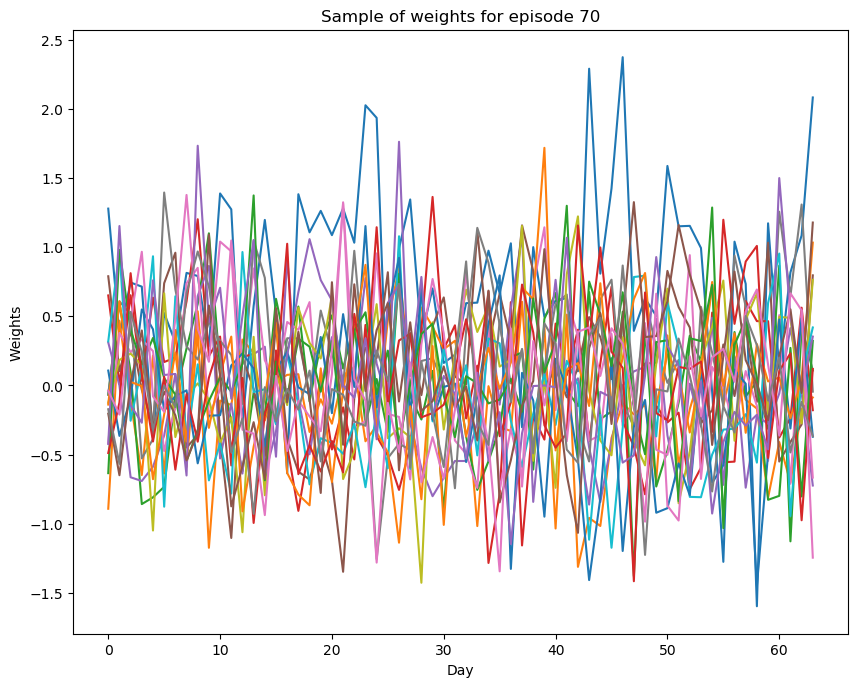

Episode: 70, Reward: 0.15, Qmax: 0.1111
Episode: 71, Reward: 0.53, Qmax: 0.1081
Episode: 72, Reward: 0.15, Qmax: 0.1124
Episode: 73, Reward: 0.69, Qmax: 0.1101
Episode: 74, Reward: 0.41, Qmax: 0.1125
Episode: 75, Reward: 0.51, Qmax: 0.1124
Episode: 76, Reward: 0.00, Qmax: 0.1119
Episode: 77, Reward: 0.47, Qmax: 0.1152
Episode: 78, Reward: 0.51, Qmax: 0.1154
Episode: 79, Reward: -0.04, Qmax: 0.1176


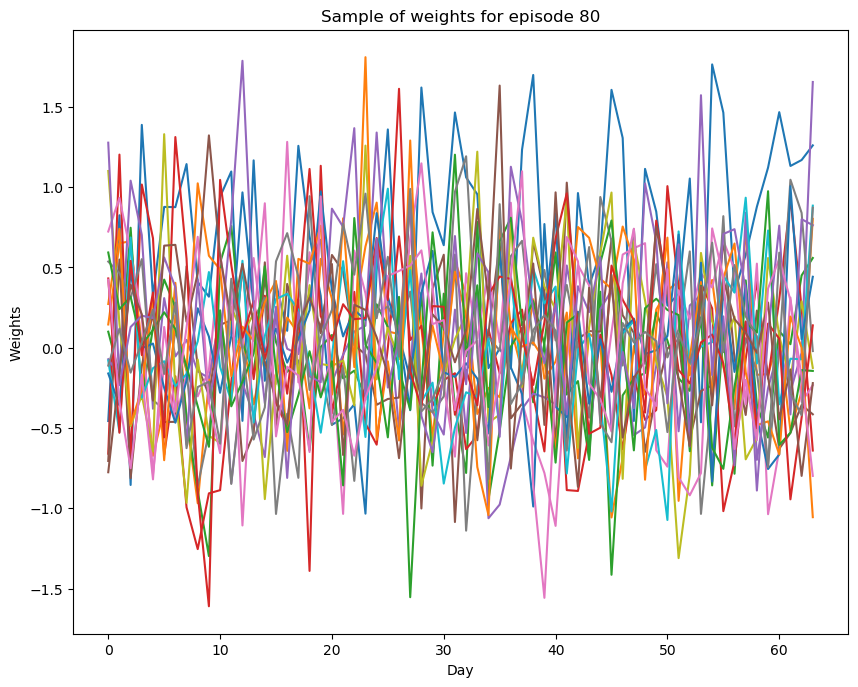

Episode: 80, Reward: 0.08, Qmax: 0.1173
Episode: 81, Reward: 0.05, Qmax: 0.1168
Episode: 82, Reward: 0.08, Qmax: 0.1152
Episode: 83, Reward: 0.50, Qmax: 0.1165
Episode: 84, Reward: 0.11, Qmax: 0.1190
Episode: 85, Reward: 0.33, Qmax: 0.1192
Episode: 86, Reward: 0.97, Qmax: 0.1217
Episode: 87, Reward: 0.57, Qmax: 0.1237
Episode: 88, Reward: 0.51, Qmax: 0.1257
Episode: 89, Reward: 0.45, Qmax: 0.1226


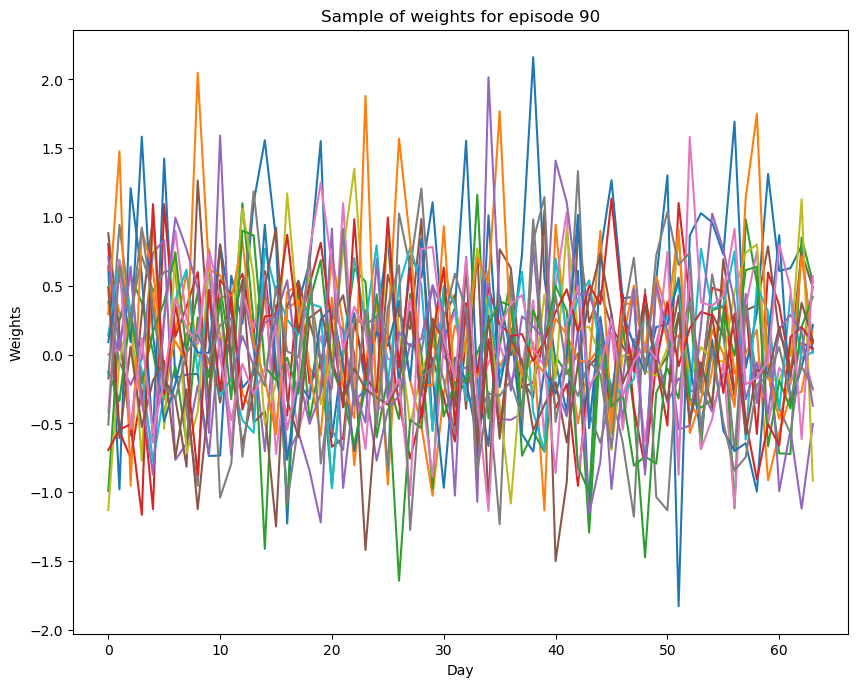

Episode: 90, Reward: 0.19, Qmax: 0.1240
Episode: 91, Reward: 0.38, Qmax: 0.1250
Episode: 92, Reward: 0.73, Qmax: 0.1225
Episode: 93, Reward: 0.73, Qmax: 0.1266
Episode: 94, Reward: 0.50, Qmax: 0.1248
Episode: 95, Reward: 0.28, Qmax: 0.1249
Episode: 96, Reward: 0.06, Qmax: 0.1261
Episode: 97, Reward: -0.21, Qmax: 0.1252
Episode: 98, Reward: 0.54, Qmax: 0.1256
Episode: 99, Reward: 1.13, Qmax: 0.1305
save model.

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Model saved in weights/stock/DDPG/lstm/window_3/batch_norm/checkpoint.ckpt
Finish.


In [7]:
with tf.variable_scope(variable_scope):
    sess = tf.Session()
    
    if(framework == 'DDPG'):
        actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size,
                           predictor_type, use_batch_norm)
        critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm)
        model = DDPG(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                          config_file='config/stock.json', model_save_path=model_save_path,
                          summary_path=summary_path)
        model.initialize(load_weights=False)
        print('calling DDPG train')
        model.train()
        
    elif(framework =='TD3'):
        actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size,
                           predictor_type, use_batch_norm)
        critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                               inp_actions=actor.scaled_out)
        model = TD3(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                          config_file='config/stock.json', model_save_path=model_save_path,
                          summary_path=summary_path)
        model.initialize(load_weights=False)
        print('calling TD3 train')
        model.train()
        

In [8]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

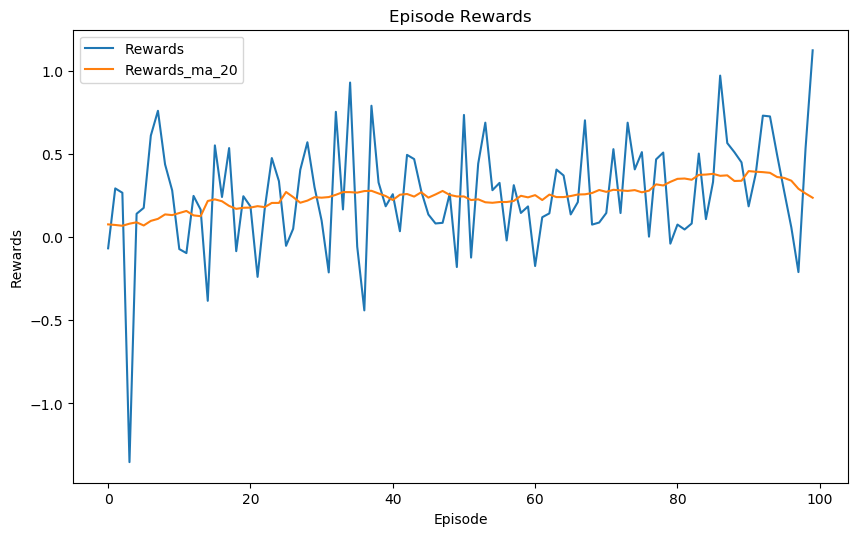

In [9]:
# Plot showing the Rewards
df = pd.DataFrame()
df["Episode"] = range(len(model.ep_rewards))
df.set_index('Episode', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
plt.title('Episode Rewards')
plt.xlabel('Episode')
plt.ylabel('Rewards')
df['Rewards'] = model.ep_rewards
plt.plot(df['Rewards'],label='Rewards')
plt.plot(movingaverage(model.ep_rewards, 20), label='Rewards_ma_20')
plt.legend()
plt.show()